In [363]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#Reference: geeksforgeeks.com
#TODO: https://www.shufflup.org/volatility.php

In [364]:
asset = "DCN-USD"
start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)

In [365]:
data = yf.download(asset, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [366]:
data = data["Close"].to_frame()
data = data.reset_index()
data

,Date,Close
0,2020-01-01,0.000018
1,2020-01-02,0.000023
2,2020-01-03,0.000036
3,2020-01-04,0.000035
4,2020-01-05,0.000029
...,...,...
361,2020-12-27,0.000009
362,2020-12-28,0.000010
363,2020-12-29,0.000014
364,2020-12-30,0.000012


In [367]:

#Initialize
portfolio = pd.DataFrame(columns=["Date", "Price", "Lot", "Stock", "Cash", "Total"])
portfolio_rebalance = portfolio.copy()
portfolio_unbalance = portfolio.copy()
initial_cap = 1000.0
initial_alloc = {"Date": data["Date"].iloc[0], 
                "Price": data["Close"].iloc[0], 
                "Lot": (initial_cap/2) / data["Close"].iloc[0], 
                "Stock": initial_cap/2, 
                "Cash": initial_cap/2, 
                "Total": initial_cap}
portfolio_rebalance = portfolio_rebalance.append(initial_alloc, ignore_index=True)
portfolio_unbalance = portfolio_unbalance.append(initial_alloc, ignore_index=True)
print(portfolio_rebalance, "\n", portfolio_unbalance)

        Date     Price           Lot  Stock   Cash   Total
0 2020-01-01  0.000018  2.777778e+07  500.0  500.0  1000.0 
         Date     Price           Lot  Stock   Cash   Total
0 2020-01-01  0.000018  2.777778e+07  500.0  500.0  1000.0


In [368]:
for i in range(1, len(data)):
    date = data["Date"].iloc[i]
    price = data["Close"].iloc[i]
    lot = portfolio_rebalance["Lot"].iloc[i-1]
    stock = price * portfolio_rebalance["Lot"].iloc[i-1]
    cash = portfolio_rebalance["Cash"].iloc[i-1]

    #TODO: BISA DI SMOOTH
    if stock/cash != 3.0: #unbalanced
        total = stock + cash
        lot = (total/2) / price
        stock = lot * price
        cash = total - stock

    temp = {"Date": date,
            "Price": price,
            "Lot": lot,
            "Stock": stock,
            "Cash": cash,
            "Total": total}
    portfolio_rebalance = portfolio_rebalance.append(temp, ignore_index=True)
portfolio_rebalance

,Date,Price,Lot,Stock,Cash,Total
0,2020-01-01,0.000018,2.777778e+07,500.000000,500.000000,1000.000000
1,2020-01-02,0.000023,2.475845e+07,569.444440,569.444440,1138.888880
2,2020-01-03,0.000036,2.028818e+07,730.374397,730.374397,1460.748793
3,2020-01-04,0.000035,2.057801e+07,720.230305,720.230305,1440.460609
4,2020-01-05,0.000029,2.270677e+07,658.496278,658.496278,1316.992556
...,...,...,...,...,...,...
361,2020-12-27,0.000009,1.679730e+08,1511.756786,1511.756786,3023.513572
362,2020-12-28,0.000010,1.595743e+08,1595.743223,1595.743223,3191.486447
363,2020-12-29,0.000014,1.367780e+08,1914.891911,1914.891911,3829.783823
364,2020-12-30,0.000012,1.481762e+08,1778.113936,1778.113936,3556.227871


In [369]:
for i in range(1, len(data)):
    date = data["Date"].iloc[i]
    price = data["Close"].iloc[i]
    lot = portfolio_unbalance["Lot"].iloc[i-1]
    stock = price * portfolio_unbalance["Lot"].iloc[i-1]
    cash = portfolio_unbalance["Cash"].iloc[i-1]
    total = stock + cash

    # #TODO: BISA DI SMOOTH
    # if stock/cash != 1.0: #unbalanced
    #     total = stock + cash
    #     lot = (total/2) / price
    #     stock = lot * price
    #     cash = total - stock

    temp = {"Date": date,
            "Price": price,
            "Lot": lot,
            "Stock": stock,
            "Cash": cash,
            "Total": total}
    portfolio_unbalance = portfolio_unbalance.append(temp, ignore_index=True)
portfolio_unbalance

,Date,Price,Lot,Stock,Cash,Total
0,2020-01-01,0.000018,2.777778e+07,500.000000,500.0,1000.000000
1,2020-01-02,0.000023,2.777778e+07,638.888880,500.0,1138.888880
2,2020-01-03,0.000036,2.777778e+07,1000.000000,500.0,1500.000000
3,2020-01-04,0.000035,2.777778e+07,972.222214,500.0,1472.222214
4,2020-01-05,0.000029,2.777778e+07,805.555547,500.0,1305.555547
...,...,...,...,...,...,...
361,2020-12-27,0.000009,2.777778e+07,250.000000,500.0,750.000000
362,2020-12-28,0.000010,2.777778e+07,277.777761,500.0,777.777761
363,2020-12-29,0.000014,2.777778e+07,388.888880,500.0,888.888880
364,2020-12-30,0.000012,2.777778e+07,333.333333,500.0,833.333333


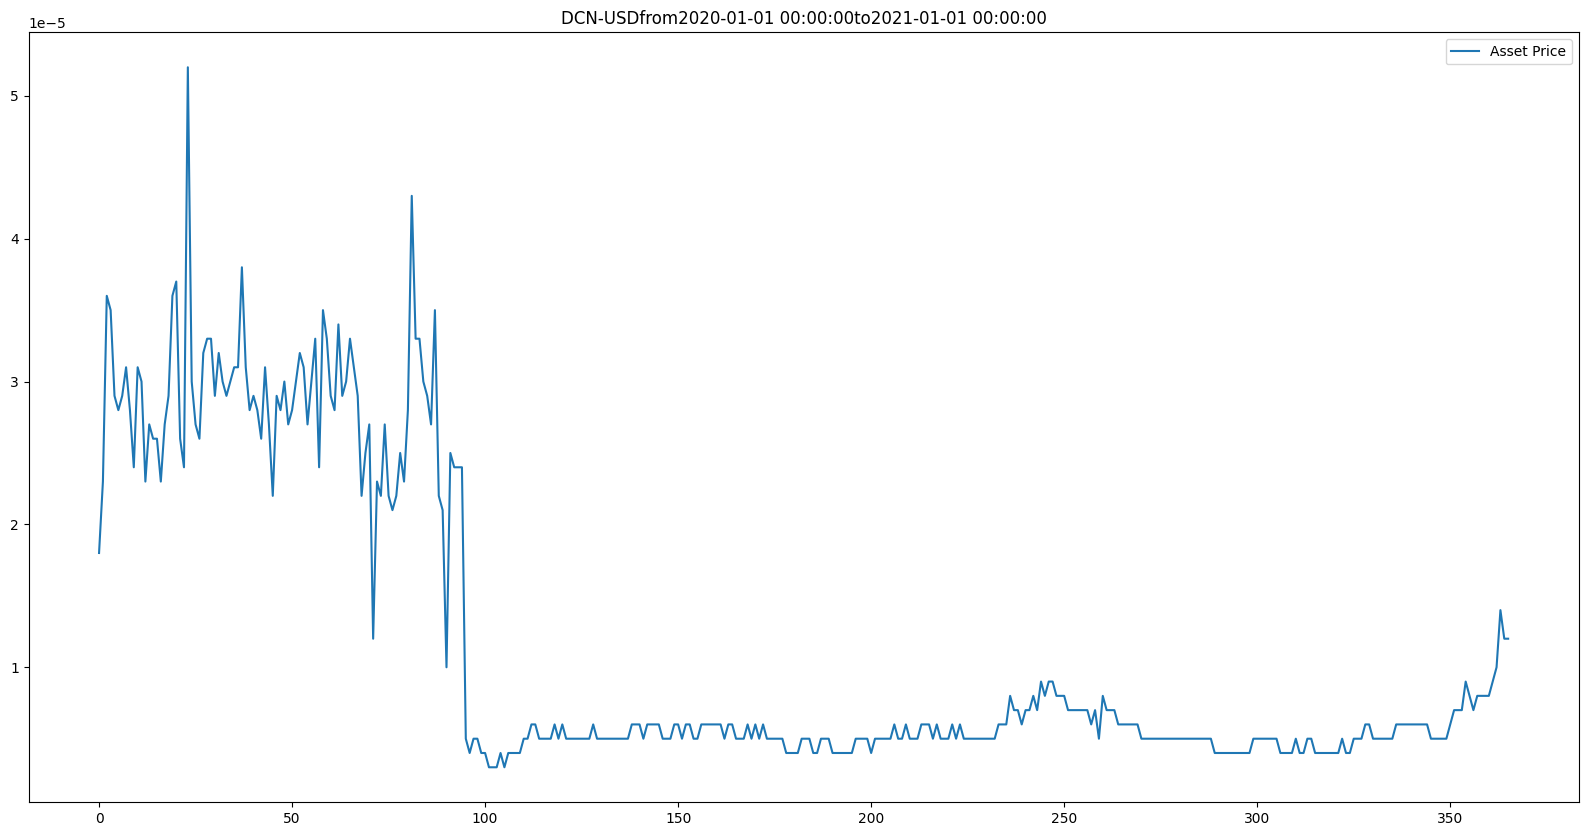

In [370]:
plt.figure(figsize = (20,10))
plt.title(asset + "from" + str(start_date) + "to" + str(end_date))
plt.plot(data['Close'], label = "Asset Price")
plt.legend()
plt.show()

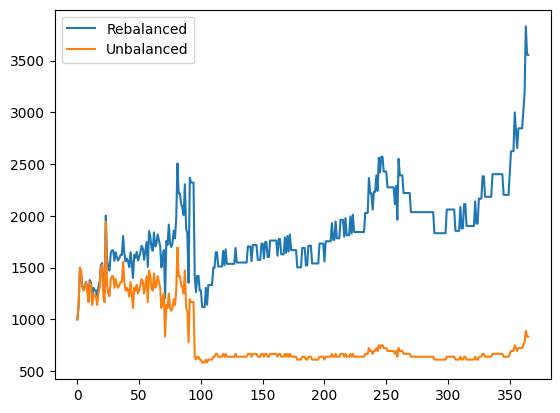

In [371]:
plt.plot(portfolio_rebalance["Total"], label = "Rebalanced")
plt.plot(portfolio_unbalance["Total"], label = "Unbalanced")
plt.legend()
plt.show()